In [ ]:
#-*- coding: utf-8 -*-
"""
@author:MD.Nazmuddoha Ansary
"""
from __future__ import print_function
from termcolor import colored
from tqdm.notebook import tqdm
# ---------------------------------------------------------
# imports
# ---------------------------------------------------------
import argparse
import sys
import pandas as pd
import numpy as np 
import cv2
import os
import random
from PIL import ImageFont, Image, ImageDraw
import matplotlib.pyplot as plt
%matplotlib inline
# ---------------------------------------------------------
# globals
# ---------------------------------------------------------
# the font path
FONT_PATH       =  'font.ttf'
# the desired data size
DATA_HEIGHT     =   64
# the number of samples to take for each sample number
SAMPLE_NUM      =   10000
# the maximum number of sample to take
MAX_SAMPLES     =   8
#---------------------------------------------------------------
def stripPads(arr,val):
    '''
        strip specific value
        args:
            arr :   the numpy array (2d)
            val :   the value to strip
        returns:
            the clean array
    '''
    # x-axis
    arr=arr[~np.all(arr == val, axis=1)]
    # y-axis
    arr=arr[:, ~np.all(arr == val, axis=0)]
    return arr

def cleanImage(img):
    '''
        cleans and resizes the image after stripping
        args:
            img : numpy array grayscale image
        returns:
            resized clean image
    '''
    # Otsu's thresholding after Gaussian filtering
    blur = cv2.GaussianBlur(img,(5,5),0)
    _,img = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    # strip
    img=stripPads(img,255)
    # get shape
    h,w=img.shape
    WIDTH=int(DATA_HEIGHT*(w/h))
    # resize to char dim
    img=cv2.resize(img,(WIDTH,DATA_HEIGHT))
    # Otsu's thresholding after Gaussian filtering
    blur = cv2.GaussianBlur(img,(5,5),0)
    _,img = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    return img

def padImage(img,PAD_DIM=256,IMG_DIM=256):
    '''
        pads an image to (512,512,3) and resizes to (256,256,3)
    '''
    # pad updown
    h,w,d=img.shape
    top_bottom_pad=np.ones(((PAD_DIM-h)//2,w,d))*255
    img=np.concatenate([top_bottom_pad,img,top_bottom_pad],axis=0)
    img=img.astype('uint8')
    img=cv2.resize(img,(IMG_DIM,IMG_DIM))
    
    
    
    
    '''
    # pad left right
    h,w,d=img.shape
    left_right_pad=np.ones((h,(PAD_DIM-w)//2,d))*255
    img=np.concatenate([left_right_pad,img,left_right_pad],axis=1)
    img=img.astype('uint8')
    img=cv2.resize(img,(IMG_DIM,IMG_DIM))
    
    '''
    return img

def padMask(img,PAD_DIM=256,IMG_DIM=256):
    '''
        pads an image to (512,512,3) and resizes to (256,256,3)
    '''
    # pad updown
    h,w,d=img.shape
    top_bottom_pad=np.zeros(((PAD_DIM-h)//2,w,d))
    img=np.concatenate([top_bottom_pad,img,top_bottom_pad],axis=0)
    img=img.astype('uint8')
    img=cv2.resize(img,(IMG_DIM,IMG_DIM))
    
    
    
    '''
    # pad left right
    h,w,d=img.shape
    left_right_pad=np.zeros((h,(PAD_DIM-w)//2,d))
    img=np.concatenate([left_right_pad,img,left_right_pad],axis=1)
    
    '''
    return img


    


In [ ]:
colors=[(255,0,0), # red
        (0,255,0), # green
        (0,0,255), # blue
        (255,255,0), # col-4
        (255,0,255), # col-5
        (0,255,255), # col-6
        (255,255,255),# col-7
        (128,128,128) # col-8
       ]

In [ ]:
# ---------------------------------------------------------
DATA_DIR        =   "/media/ansary/DriveData/Work/APSIS/data/"
# the labels
LABELS_CSV      =   os.path.join(DATA_DIR,'label.csv')
# the raw imaged
PNG_DIR         =   os.path.join(DATA_DIR,'RAW')
'''
# image saving dir
IMG_DIR         =   create_dir(DATA_DIR,'images')
# target saving dir
TGT_DIR         =   create_dir(DATA_DIR,'targets')

'''

# read dataframe 
df=pd.read_csv(LABELS_CSV)
df=df[['image_id','grapheme']]
# iterate
# create images
SAMPLE_NUM=8
imgs=[]
tgts=[]
# select the data
_df=df.sample(n=SAMPLE_NUM)

# get labels and image
for iid,cid in zip(_df.image_id.tolist(),range(SAMPLE_NUM)):
    img_path=os.path.join(PNG_DIR,f"{iid}.png")
    # read
    img=cv2.imread(img_path,0)
    # clean
    img=cleanImage(img)
    x,y=np.where(img==0)
    img=np.expand_dims(img,axis=-1)
    img=np.concatenate([img,img,img],axis=-1)
    # tgt
    tgt=np.zeros(img.shape)
    tgt[:,:,:]=colors[cid]
    tgt[x,y,:]=(0,0,0)
    tgt=tgt.astype('uint8')
    # append
    imgs.append(img)
    tgts.append(tgt)
    
# combine
img=np.concatenate(imgs,axis=1)
img=padImage(img)
plt.imshow(img)
plt.show()
print(img.shape)
tgt=np.concatenate(tgts,axis=1)
tgt=padMask(tgt)
plt.imshow(tgt)
plt.show()
print(tgt.shape)

In [ ]:
# ---------------------------------------------------------
# imports
# ---------------------------------------------------------
import argparse
import sys
import pandas as pd
import numpy as np 
import cv2
import os
import random
from PIL import ImageFont, Image, ImageDraw
from utils import *
# ---------------------------------------------------------
# globals
# ---------------------------------------------------------
# the font path
FONT_PATH       =  'font.ttf'
# the desired data size
DATA_DIM        =   128 
# max size of font
FONT_SIZE   =   80
#---------------------------------------------------------------
def stripPads(arr,val):
    '''
        strip specific value
        args:
            arr :   the numpy array (2d)
            val :   the value to strip
        returns:
            the clean array
    '''
    # x-axis
    arr=arr[~np.all(arr == val, axis=1)]
    # y-axis
    arr=arr[:, ~np.all(arr == val, axis=0)]
    return arr


def getTextImage(text,_font):
    '''
        create image from text
        args:
            text    :   the text to cleate the image of
            _font   :   the specific sized font to load
        returns:
            the written text image
    '''

    WIDTH,HEIGHT=DATA_DIM,DATA_DIM
    # RGB image
    img = Image.new('RGB', (WIDTH,HEIGHT))
    # draw object
    draw = ImageDraw.Draw(img)
    # text height width
    w, h = draw.textsize(text, font=_font) 
    # drawing in the center
    draw.text(((WIDTH - w) / 2,(HEIGHT - h) / 2), text, font=_font)
    # grayscale
    img=img.convert('L')
    # array
    img=np.array(img)
    # inversion
    img=255-img
    return img


In [ ]:
import pytesseract
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
img=cv2.imread('f.png',0)
_font = ImageFont.truetype(FONT_PATH,FONT_SIZE)
img=getTextImage("ঠিক",_font)
plt.imshow(img)
plt.show()
pred = pytesseract.image_to_string(img, lang='ben', config='--psm 6')
pred

In [11]:
#!/usr/bin/env python3
#-*- coding: utf-8 -*-
"""
@author:MD.Nazmuddoha Ansary
"""
from __future__ import print_function
from termcolor import colored
from tqdm import tqdm
# ---------------------------------------------------------
# imports
# ---------------------------------------------------------
import argparse
import sys
import pandas as pd
import numpy as np 
import cv2
import os
import random
from PIL import ImageFont, Image, ImageDraw
from utils import *
import matplotlib.pyplot as plt
%matplotlib inline
# ---------------------------------------------------------
# globals
# ---------------------------------------------------------
DATA_DIM=256
# the font path
FONT_PATH       =  'font.ttf'
# the charecter font data size
CHAR_DIM        =   50
# the number of samples to take for each sample number
SAMPLE_NUM      =   200000
# the maximum number of sample to take
MAX_SAMPLES     =   8
# max size of font
FONT_SIZE   =   50
#100,70,60,50,40,35,32
#---------------------------------------------------------------
def stripPads(arr,val):
    '''
        strip specific value
        args:
            arr :   the numpy array (2d)
            val :   the value to strip
        returns:
            the clean array
    '''
    # x-axis
    arr=arr[~np.all(arr == val, axis=1)]
    # y-axis
    arr=arr[:, ~np.all(arr == val, axis=0)]
    return arr


def getTextImage(text,_font):
    '''
        create image from text
        args:
            text    :   the text to cleate the image of
            _font   :   the specific sized font to load
        returns:
            the written text image
    '''

    WIDTH,HEIGHT=DATA_DIM,DATA_DIM
    # RGB image
    img = Image.new('RGB', (WIDTH,HEIGHT))
    # draw object
    draw = ImageDraw.Draw(img)
    # text height width
    w, h = draw.textsize(text, font=_font) 
    # drawing in the center
    draw.text(((WIDTH - w) / 2,(HEIGHT - h) / 2), text, font=_font)
    # grayscale
    img=img.convert('L')
    # array
    img=np.array(img)
    # inversion
    img=255-img
    return img

def cleanImage(img):
    '''
        cleans and resizes the image after stripping
        args:
            img : numpy array grayscale image
        returns:
            resized clean image
    '''
    # Otsu's thresholding after Gaussian filtering
    blur = cv2.GaussianBlur(img,(5,5),0)
    _,img = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    # strip
    img=stripPads(img,255)
    h,w=img.shape
    # resize to char dim
    img=cv2.resize(img,(w,CHAR_DIM))
    # Otsu's thresholding after Gaussian filtering
    blur = cv2.GaussianBlur(img,(5,5),0)
    _,img = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    return img

def invert_img(img):
    '''
        inverts an img
    '''
    img=img/255.0
    img=1-img
    img=img*255
    img=img.astype('uint8')
    return img

def joinData(img):
    kernel=np.ones((5,5),np.uint8)
    img=invert_img(img)
    img=cv2.dilate(img,kernel,iterations=2)
    img=invert_img(img)
    return img
    
def padImage(img):
    '''
        pads an image and resizes
    '''
    # pad updown
    h,w=img.shape
    top_bottom_pad=np.ones(((DATA_DIM-h)//2,w))*255
    img=np.concatenate([top_bottom_pad,img,top_bottom_pad],axis=0)
    img=img.astype('uint8')
    img=cv2.resize(img,(DATA_DIM,DATA_DIM))
    return img    

def processTarget(img):
    img=stripPads(img,255)
    h,w=img.shape
    # resize to char dim
    img=cv2.resize(img,(DATA_DIM,DATA_DIM))
    # Otsu's thresholding after Gaussian filtering
    blur = cv2.GaussianBlur(img,(5,5),0)
    _,img = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    return img


  0%|          | 0/200000 [00:00<?, ?it/s]

#LOG     :Sample Size:5


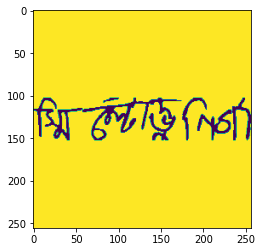

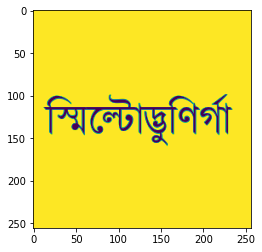

  0%|          | 0/200000 [00:00<?, ?it/s]


In [12]:

# ---------------------------------------------------------
DATA_DIR        =   "/media/ansary/DriveData/Work/APSIS/data/"
# the labels
LABELS_CSV      =   os.path.join(DATA_DIR,'label.csv')
# the raw imaged
PNG_DIR         =   os.path.join(DATA_DIR,'RAW')


# read dataframe 
df=pd.read_csv(LABELS_CSV)
df=df[['image_id','grapheme']]
# iterate
sample_num=5
LOG_INFO(f"Sample Size:{sample_num}")
# set font for the desired sample size
_font = ImageFont.truetype(FONT_PATH,FONT_SIZE)
# create images
for i in tqdm(range(SAMPLE_NUM)):
    label_text=''
    imgs=[]
    # select the data
    _df=df.sample(n=sample_num)
    # random iden
    iden=random.randint(0,SAMPLE_NUM)
    # file name
    fname=f"{iden}_{i}_{sample_num}.png"

    # get labels and image
    for iid,label in zip(_df.image_id.tolist(),_df.grapheme.tolist()):
        img_path=os.path.join(PNG_DIR,f"{iid}.png")
        # read
        img=cv2.imread(img_path,0)
        # clean
        img=cleanImage(img)
        # append
        imgs.append(img)
        label_text+=label

    # combine
    img=np.concatenate(imgs,axis=1)
    img=padImage(img)
    # process target
    tgt=getTextImage(label_text,_font)
    #tgt=processTarget(tgt)
    plt.imshow(img)
    plt.show()
    plt.imshow(tgt)
    plt.show()
    break


In [13]:
import pytesseract
pred = pytesseract.image_to_string(tgt, lang='ben', config='--psm 6')
pred

'্মিল্টোডুনির্গা\n\x0c'

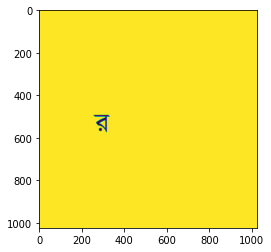

In [20]:
_font = ImageFont.truetype(FONT_PATH,128)

def getLongTextImage(text,_font):
    '''
        create image from text
        args:
            text    :   the text to cleate the image of
            _font   :   the specific sized font to load
        returns:
            the written text image
    '''

    WIDTH,HEIGHT=1024,1024
    # RGB image
    img = Image.new('RGB', (WIDTH,HEIGHT))
    # draw object
    draw = ImageDraw.Draw(img)
    # text height width
    w, h = draw.textsize(text, font=_font) 
    # drawing in the center
    draw.text(((WIDTH - w) / 2,(HEIGHT - h) / 2), text, font=_font)
    # grayscale
    img=img.convert('L')
    # array
    img=np.array(img)
    # inversion
    img=255-img
    return img
img=getLongTextImage("র         ",_font)
plt.imshow(img)
plt.show()


In [21]:
import pytesseract
pred = pytesseract.image_to_string(img, lang='ben', config='--psm 6')
pred

'বর\n\x0c'

In [ ]:
BCE/